<a href="https://colab.research.google.com/github/m1nc/CS4375-linear-regression-gradient-descent/blob/main/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np #numbers
import pandas as pd # data
import matplotlib.pyplot as plt #plots

from sklearn.model_selection import train_test_split #data split
from sklearn.preprocessing import StandardScaler #standardizer
from sklearn.linear_model import SGDRegressor #linear regression w/ gradient descent
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score



In [80]:
#loading data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url, sep=";")

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [81]:
#print("Shape:", df.shape)
#print("\nMissing values:\n", df.isnull().sum())
#print("\nDuplicate rows:", df.duplicated().sum())


In [82]:
#removing duplicates only since there are no missing values
df = df.drop_duplicates()


In [83]:
#defining features and targets

X = df.drop("quality", axis=1)
y = df["quality"]


In [84]:

#standardizes features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [85]:
#Splits between training and testing data
#80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#print("# of training samples:", X_train.shape[0])
#print("# of Test samples:", X_test.shape[0])


In [87]:
# tuning parameters
learning_rates = [0.0001, 0.001, 0.01, 0.1]
iterations = [500, 1000, 2000]

results = []

best_test_mse = float("inf")
best_params = None

with open("part2_log.txt", "w") as f:

    for lr in learning_rates:
        for it in iterations:

            model = SGDRegressor(
                learning_rate='constant',
                eta0=lr,
                max_iter=it,
                random_state=42
            )

            model.fit(X_train, y_train)

            y_train_pred = model.predict(X_train)#makes predictions
            y_test_pred = model.predict(X_test)

            #compute errors
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)
            r2 = r2_score(y_test, y_test_pred)
            evs = explained_variance_score(y_test, y_test_pred)

            results.append([lr, it, train_mse, test_mse])

            # writing each trial
            f.write(
                f"LearningRate={lr}, Iterations={it}, "
                f"Train MSE={train_mse:.4f}, "
                f"Test MSE={test_mse:.4f}, "
                f"R2={r2:.4f}, "
                f"EVS={evs:.4f}\n"
            )

            # checks if model is the best
            if test_mse < best_test_mse:
                best_test_mse = test_mse
                best_params = (lr, it)

    # Write best results at end
    f.write("\nBest Parameters:\n")
    f.write(f"Learning Rate: {best_params[0]}\n")
    f.write(f"Iterations: {best_params[1]}\n")
    f.write(f"Best Test MSE: {best_test_mse:.4f}\n")


In [72]:

results_df = pd.DataFrame(results, columns=["Learning Rate", "Iterations", "Train MSE", "Test MSE"])
results_df.sort_values("Test MSE")


,Learning Rate,Iterations,Train MSE,Test MSE
0,0.0001,500,4.388765e-01,4.164974e-01
1,0.0001,1000,4.388765e-01,4.164974e-01
2,0.0001,2000,4.388765e-01,4.164974e-01
3,0.0010,500,4.352237e-01,4.223824e-01
4,0.0010,1000,4.352237e-01,4.223824e-01
5,0.0010,2000,4.352237e-01,4.223824e-01
6,0.0100,500,4.404064e-01,4.238593e-01
7,0.0100,1000,4.404064e-01,4.238593e-01
8,0.0100,2000,4.404064e-01,4.238593e-01
9,0.1000,500,9.589847e+09,9.679613e+09


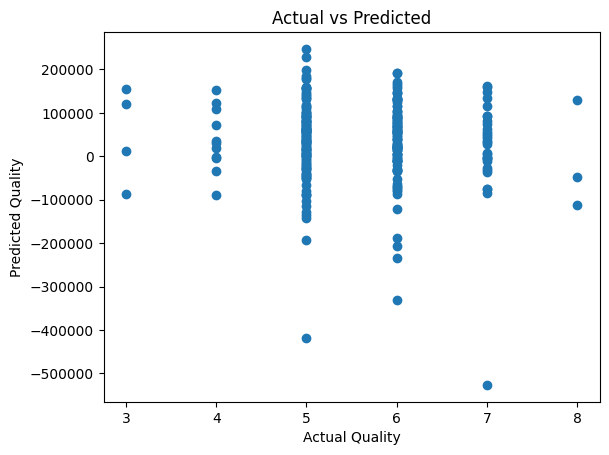

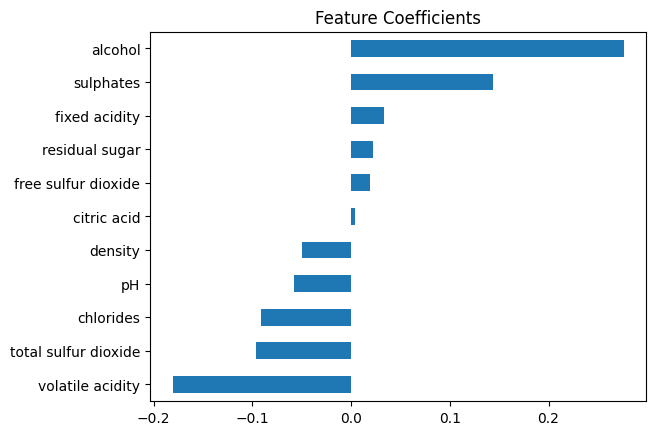

In [94]:

plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted")

plt.grid(True)
plt.savefig("actual_vs_predicted.png")
plt.show()

coefficients = pd.Series(final_model.coef_, index=X.columns)

coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients")
plt.show()



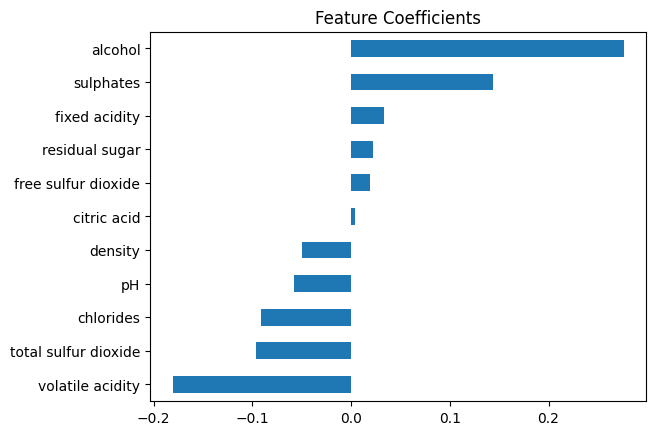

In [95]:


# Assume final_model is trained and X is your feature DataFrame
coefficients = pd.Series(final_model.coef_, index=X.columns)

# Sort and plot horizontally
coefficients.sort_values().plot(kind='barh')

plt.title("Feature Coefficients")

# Save the plot to file
plt.savefig("feature_coefficients.png")




In [73]:
#building final model

#extracts best learning rate
#best_params = (best_learning_rate, best_iterations)
best_lr = best_params[0]
best_iter = best_params[1]

final_model = SGDRegressor(
    learning_rate='constant',
    eta0=best_lr,
    max_iter=best_iter,
    random_state=42
)

final_model.fit(X_train, y_train) #trains final model


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=500,
             random_state=42)

In [74]:
#make predictions
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

#calculate training MSE
train_mse = mean_squared_error(y_train, y_train_pred)
#calculate test MSE
test_mse = mean_squared_error(y_test, y_test_pred)

#calculate R^2 Score
r2 = r2_score(y_test, y_test_pred)

#calculate Explained Variance
evs = explained_variance_score(y_test, y_test_pred)

#Print results
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("R2 Score:", r2)
print("Explained Variance:", evs)


Train MSE: 0.43887653936636833
Test MSE: 0.41649735689201794
R2 Score: 0.41202243111990666
Explained Variance: 0.4122181565158416


In [88]:
#Remove this in final code
#testing model with data outside dataset
new_wine_df = pd.DataFrame(
    [[7.6, 0.68, 0.04, 2.1, 0.078,
      13, 38, 0.9982, 3.48,
      0.58, 9.6]],
    columns=X.columns
)

# Scale
new_wine_scaled = scaler.transform(new_wine_df)

# Predict
prediction = final_model.predict(new_wine_scaled)

print("Predicted Quality:", prediction[0])


Predicted Quality: 5.066691874822032
